[View in Colaboratory](https://colab.research.google.com/github/sungreong/TIL/blob/master/Kernel%20Density_3_Homework_Optimized_Bandwidth.ipynb)

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
cd ./gdrive/My Drive/대학원수업/비모수회귀분석(함수추정)

/content/gdrive/My Drive/대학원수업/비모수회귀분석(함수추정)


In [0]:
#!pip install getdist
#!pip install KDEpy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.neighbors import KernelDensity
import seaborn as sns; sns.set(color_codes=True)
from scipy import stats
from matplotlib.mlab import bivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import os
from getdist import plots, MCSamples
import getdist, IPython
from KDEpy import FFTKDE
from KDEpy import *
from scipy.stats import norm


# 1. Estimate The Density of the first variable (refreactive index)

* Dataset = Forensic Glass Data From MASS

## 1.1 Using Epanechnikov kernel

In [0]:
data = pd.read_csv("Forensic_Glass.csv" )
data = data.iloc[:, 1:]
RI =  data.RI

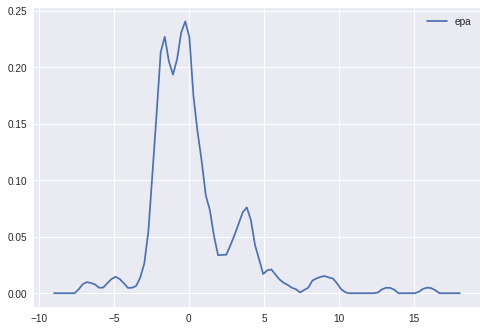

In [5]:
KERNEL = "epa"
sns.kdeplot(RI ,kernel=KERNEL,label=KERNEL )


# 1.2 , 1.3 MISE , Rule of Thumb( scott , silverman )

## sns.kdeplot  ("Rule of Thumb") 
* defualt  kerenl = "gau"
* kernel : {‘gau’ | ‘cos’ | ‘biw’ | ‘epa’ | ‘tri’ | ‘triw’ }
* bw : {‘scott’ | ‘silverman’ | scalar | pair of scalars }

* rule-of-thumb 
  
$  scott : n^{(-1./(d+4)) }$

$ Siverman's Rule : n * (d + 2) / 4.)^{(-1. / (d + 4))} $

##  KDEpy (MISE)
* kernel : gaussian exponential box tri epa biweight triweight tricube cosine
* bw_method : ['silverman', 'scott', 'ISJ'] #  FFTKDE._bw_methods.keys()


$ MISE(h) = \mathbb{E}\int (\hat f(x ; h) - f(x))^2dx $


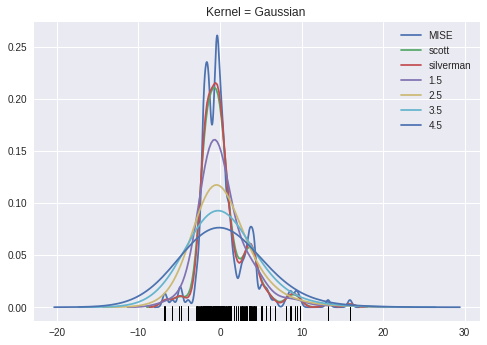

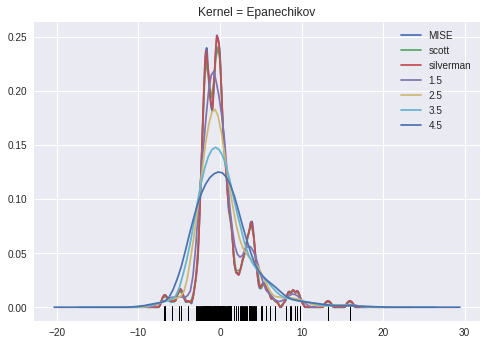

In [6]:
bw_options = ["scott", "silverman", 1.5 , 2.5 , 3.5 , 4.5 ]

data =RI.values
x, y = FFTKDE(kernel='gaussian', bw='ISJ').fit(data).evaluate()
## The Improved Sheather-Jones algorithm
plt.plot(x, y, label='MISE')
sns.rugplot( RI ,color='black')

for bw in bw_options:
    sns.kdeplot(RI ,bw= bw,label=bw , kernel="gau")

plt.title("Kernel = Gaussian ")
plt.show()

data =RI.values
x, y = FFTKDE(kernel='epa', bw='ISJ').fit(data).evaluate()
## The Improved Sheather-Jones algorithm
plt.plot(x, y, label='MISE')
bw_options = ["scott", "silverman", 1.5 , 2.5 , 3.5 , 4.5 ]
sns.rugplot( RI ,color='black')
for bw in bw_options:
    sns.kdeplot(RI ,bw= bw,label=bw , kernel="epa" )

plt.title("Kernel = Epanechikov")
plt.show()



* bandwith 이 커짐에 따라 완만한 곡선을 나타나는 것을 확인 할 수 있다.
* Kernel 에 따라서 BandWidth의 모양이 다르게 나온다.

# 2.2.1 Try to find a new real dataset which contains several variables 

* 1  Choose a Variable 
1. 2 Draw a histogram of it  
1. 3 Obtain a kernel density estimate  
1. 4 free kernel  , more than Three bandwihts 



In [0]:
data = pd.read_csv("creditcard.csv")

Text(0.5, 1.0, 'Histogram of V24')

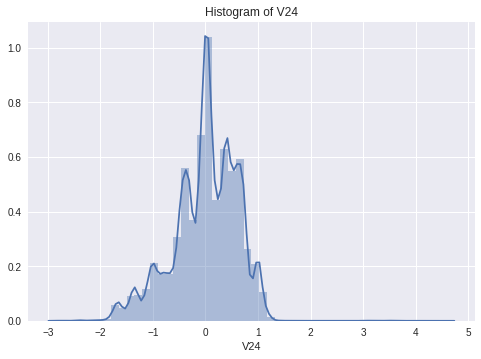

In [8]:
import warnings
warnings.filterwarnings('ignore')
# V26 V24
sns.distplot( data.V24  )
plt.title("Histogram of V24")

## sns.kdeplot  ("Rule of Thumb") 
* defualt  kerenl = "gau"
* kernel : {‘gau’ | ‘cos’ | ‘biw’ | ‘epa’ | ‘tri’ | ‘triw’ }
* bw : {‘scott’ | ‘silverman’ | scalar | pair of scalars }


### free kernel  , more than Three bandwihts 

* Bandwidth :  MISE , scott , silverman 
* Kernel : "Gaussian" , "epa "


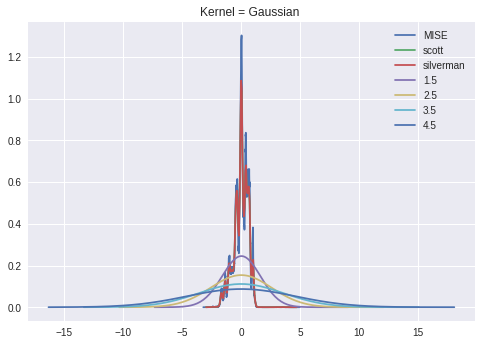

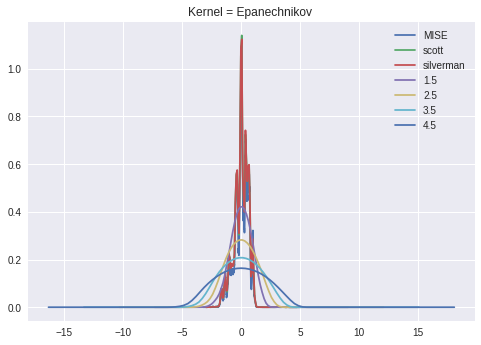

In [9]:
### Gaussian

data2 = data.V24.values
x, y = FFTKDE(kernel='gaussian', bw='ISJ').fit(data2).evaluate()
## The Improved Sheather-Jones algorithm
plt.plot(x, y, label='MISE')
bw_options = ["scott", "silverman", 1.5 , 2.5 , 3.5 , 4.5 ]
for bw in bw_options:
    sns.kdeplot( data.V24 ,bw= bw,label=bw , kernel="gau")
plt.title("Kernel = Gaussian ")
plt.show()

### EPA

x, y = FFTKDE(kernel='epa', bw='ISJ').fit(data2).evaluate()
## The Improved Sheather-Jones algorithm
plt.plot(x, y, label='MISE')
for bw in bw_options:
    sns.kdeplot( data.V24 ,bw= bw,label=bw , kernel="epa")
plt.title("Kernel = Epanechnikov ")
plt.show()

# 2.2.2 

* Find a Parametric Distribution for the variable you choose 
* Obtain the parameter estimates  
* Overlay this parametric density with your estimate from the above 
* Discuss on the above results or what you find


In [0]:
import re
def grep(pattern,fileObj):
    r=[]
    for line in fileObj:
        if re.search(pattern,line):
            r.append(line )
    return r



 truncnorm Parameter Estimates : (-2.8856156480673523, 4.6445013279041145, 0.004841236663945769, 0.6487521757570078) 

 foldnorm Parameter Estimates : (2.896377924166454, -1.8672082037188804, 0.6475207660742153) 

 exponnorm Parameter Estimates : (0.028756025246434974, -0.008562146918825045, 0.6425890422099181) 

 lognorm Parameter Estimates : (0.0025942650719471185, -248.14717221786276, 248.15618176634206) 

 gennorm Parameter Estimates : (1.8882421546613788, 0.02134593184408271, 0.8811788313480018) 

 powernorm Parameter Estimates : (1452.298693550651, 6.304960372332609, 1.8795025439919038) 



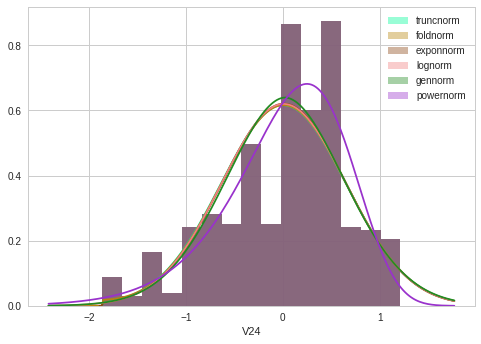

In [30]:
import warnings
warnings.filterwarnings('ignore')
sns.set( color_codes = True)
sns.set_style('whitegrid')



dist_continu = [d for d in dir(stats) if
                isinstance(getattr(stats, d), stats.rv_continuous)]
# norm 만 추출 
norms = grep("norm", dist_continu)
from matplotlib import colors as mcolors

colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
colors = list( colors.keys()  ) 

number = 6
select = np.random.choice( norms , number , replace = False ) 
color = np.random.choice( colors , number , replace = False ) 
for i in range(number) :
    se = select[i]
    c  = color[i]
    stat = eval("stats." + se)
    sns.distplot(data.loc[:500, "V24"] ,label= se  , fit = stat , fit_kws={"color" : c } , kde= False   , color= c  )
    print(" {0} Parameter Estimates : {1} ".format(se , stat.fit(data.loc[:500, "V24"]) ) )
    print("")

plt.legend()
plt.show()

* 분포의 형태가  종형태로 이루어진 것 같아 Norm 종류의 분포들을 Fitting 시켜봤습니다.
* 각 Fitting 시켰을 때의 Parameter Estimate 값도 같이 출력을 하였습니다.